# Data


An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

 * Features

   * age - Age of participant in years
   * physical_score - Score achieved during physical exam

 * Label/Target

   * test_result - 0 if no pass, 1 if test passed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


# 1) Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


check how many people passed or not passed the test

In [5]:
df.test_result.value_counts()

,count
test_result,
1,3000
0,2000


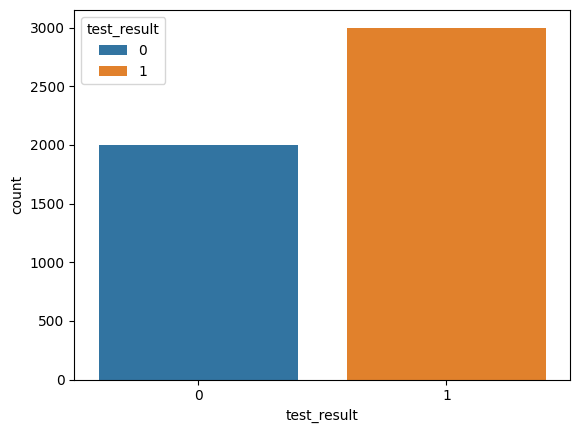

In [8]:
# visualize the data

sns.countplot(x = 'test_result',data = df,hue = 'test_result')
plt.show()

check the distribution of features vs label

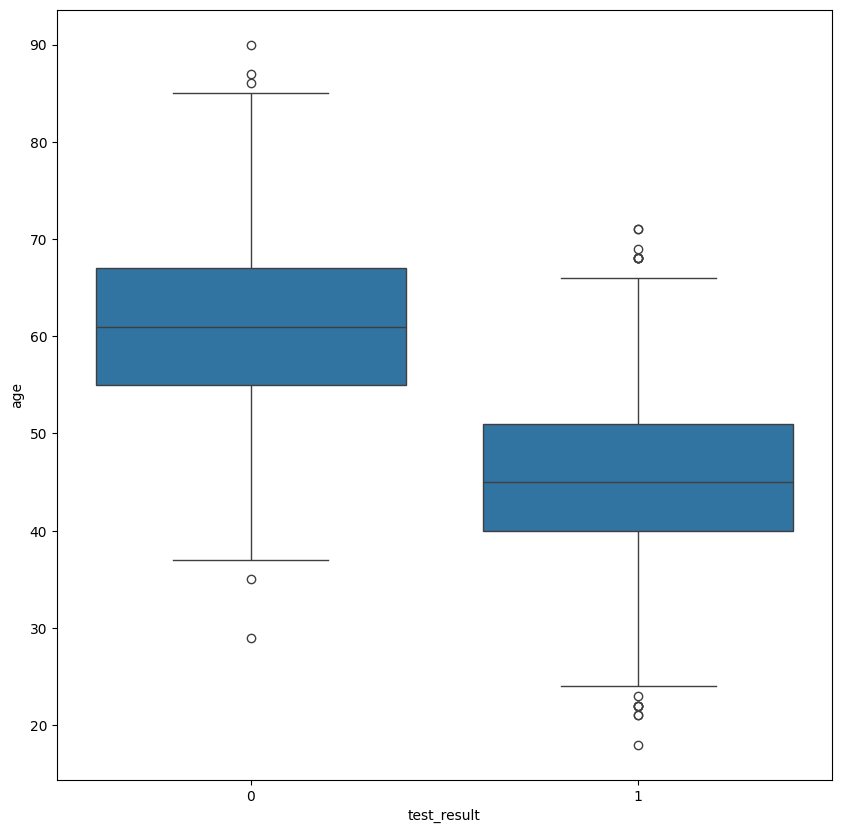

In [9]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'test_result',data = df,y = 'age')
plt.show()

As we can see from boxplot, age of people who didn't pass the test tends to be older which makes sense.However there are some outliers such under 30 years old and still didn't pass the test.

On the flip side, younger people tends to perform better and there are some outliers who are older than 60 yr and still pass the test.

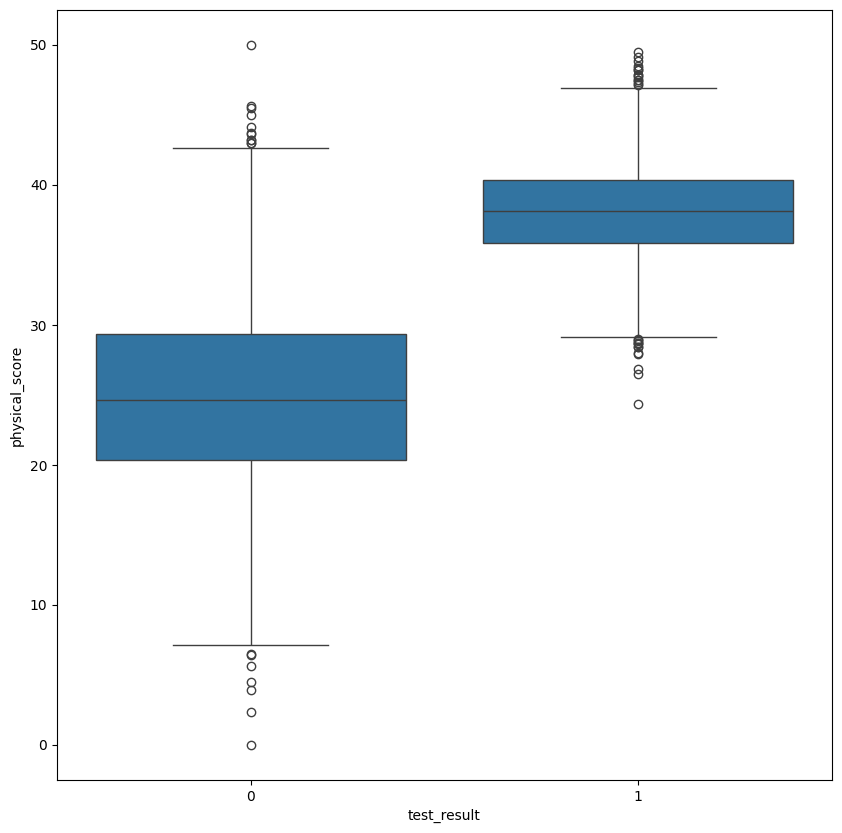

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'test_result',data = df,y = 'physical_score')
plt.show()

There is a sharp contrast between who pass the test and who didn't pass the test. The higher the physical score, you can expect to pass the test.

We can check the relationship between physical score and age.

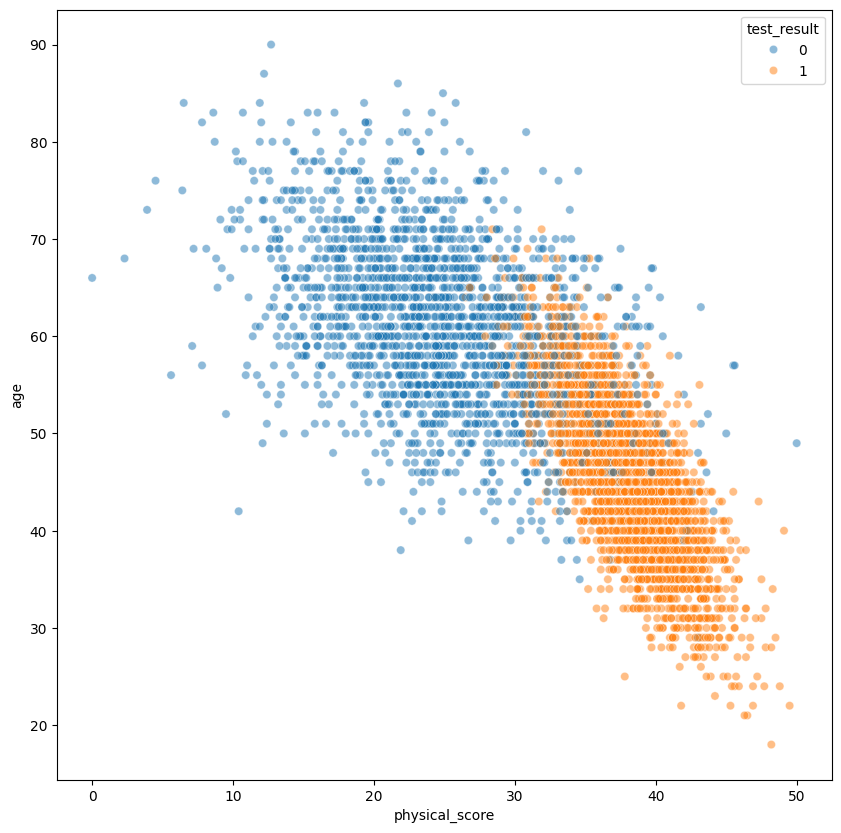

In [11]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'physical_score',y = 'age',data = df,hue = 'test_result',alpha = 0.5)
plt.show()

We can see from scatterplot, there are two group who passed the test and who didn't pass the test.

  * for people who passed the test are younger people with higher physical_score.
  * on the other hand, people who didn't pass the test tends to be older people with lower physical score.

As dataset is quite small, we can use pairplot to check the relationship between features and labels.

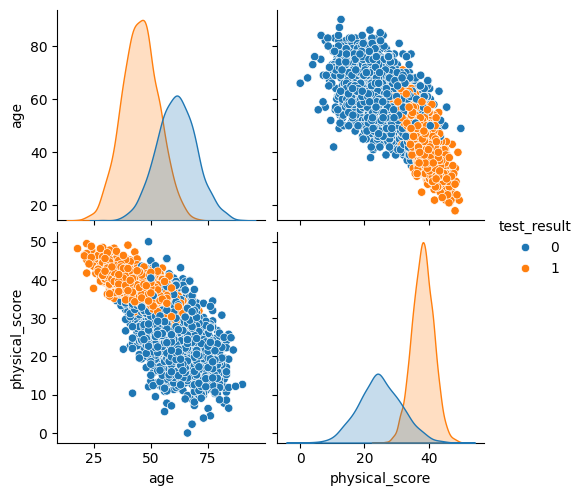

In [12]:
sns.pairplot(df,hue = 'test_result')

We can see the distribution of age, physical score. Plus age vs physical_score scatterplot.

We can use heatmap to see how correlated features are.

<Axes: >

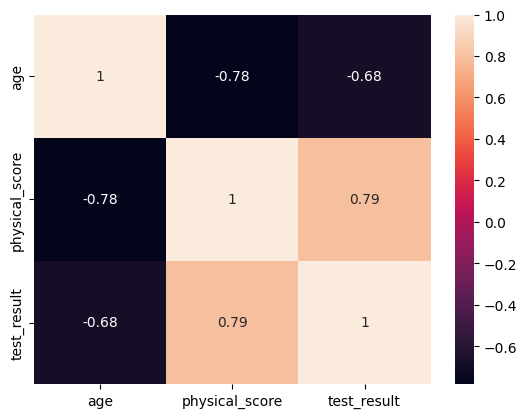

In [13]:
sns.heatmap(data = df.corr(),annot = True)

**When scatterplot doesn't informative enough for some features and labels**

Essentially if we find this kind of scatter plot, we might want to use box plot instead. Because based on the chart, we can see there are two classes and it is showing the distribution.

<Axes: xlabel='age', ylabel='test_result'>

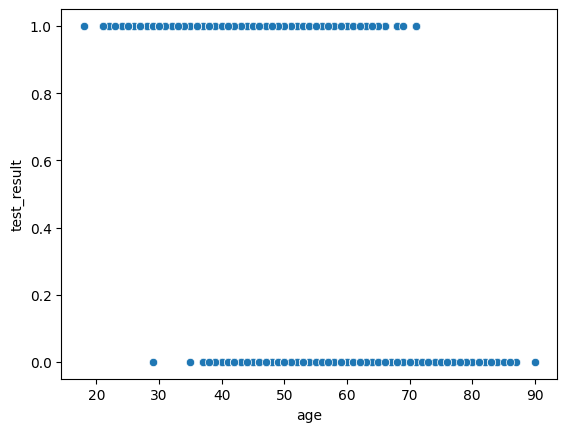

In [14]:
sns.scatterplot(x='age',y ='test_result',data = df)

<Axes: xlabel='physical_score', ylabel='test_result'>

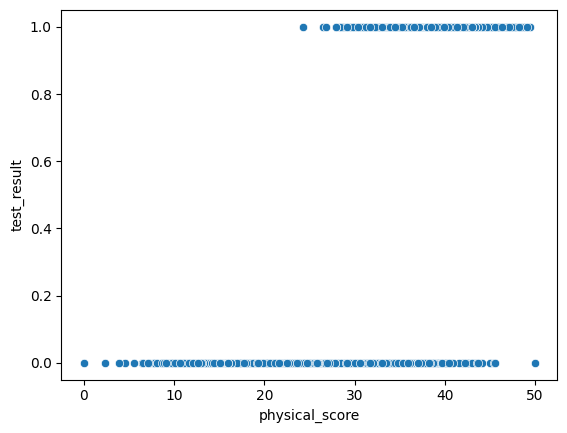

In [15]:
sns.scatterplot(x='physical_score',y ='test_result',data = df)

**3D scatterplot**

Text(0.5, 0, 'Test Result')

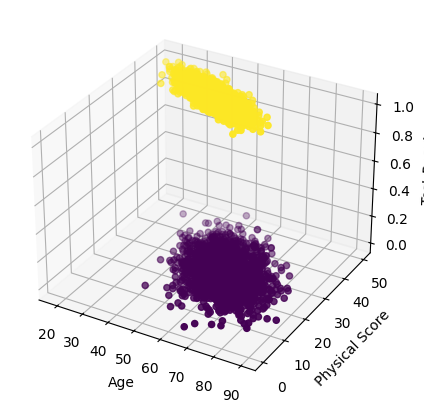

In [92]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 5)) # Create the Figure first
ax = fig.add_subplot(111, projection='3d') # IMPORTANT: Add subplot with '3d' projection
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

ax.set_xlabel('Age')
ax.set_ylabel('Physical Score')
ax.set_zlabel('Test Result')


We can see that there are clearly two clusters who passed and who didn't pass the test.

# 2) Model Training


# Train | Test Split and Scaling

In [18]:
# seperate featrues and labels
x = df.drop('test_result',axis = 1)
y = df['test_result']

In [19]:
# split train, test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [21]:
# scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred = lr_model.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,

**Coefficient Interpretation**

Based on the result below:

 * We can expect the **odds** of passing the test to decrease (the original coeff was negative) per unit increase of the age.
 * We can expect the **odds** of passing the test to increase (the original coeff was positive) per unit increase of the physical score.
 * Based on the ratios with each other, the physical_score indicator is a stronger predictor than age.

In [24]:
lr_model.coef_

array([[-0.91805986,  3.67035625]])

In [25]:
df.head(2)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1


# Model Performance on Classification Tasks

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [27]:
y_pred = lr_model.predict(x_test)

**Accuracy Score**

(TP+PN / Total)

In [28]:
# calculation Accuracy score
accuracy_score(y_test,y_pred)

0.893

**Confusion Matrix**

In [29]:
confusion_matrix(y_test,y_pred)

array([[328,  56],
       [ 51, 565]])

As the above confusion matrix returns the values, we can visualize them in better way.

**Plotting Confusion Matrix**

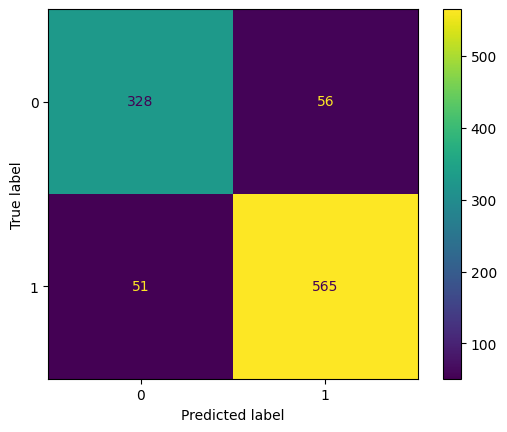

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = lr_model.classes_)
display.plot()
plt.show()

In [37]:
lr_model.classes_

array([0, 1])

**Classification Report : Recall, Precision, F1-Score per class**

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       384
           1       0.91      0.92      0.91       616

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



**Overall Precision and Recall Score**

In [45]:
from sklearn.metrics import precision_score,recall_score

print(f'Precision_score:{precision_score(y_test,y_pred)}')
print(f'Recall_score:{recall_score(y_test,y_pred)}')

Precision_score:0.9098228663446055
Recall_score:0.9172077922077922


# Evaluating Curves and AUC

In [60]:
from sklearn.metrics import RocCurveDisplay

# ROC Curve

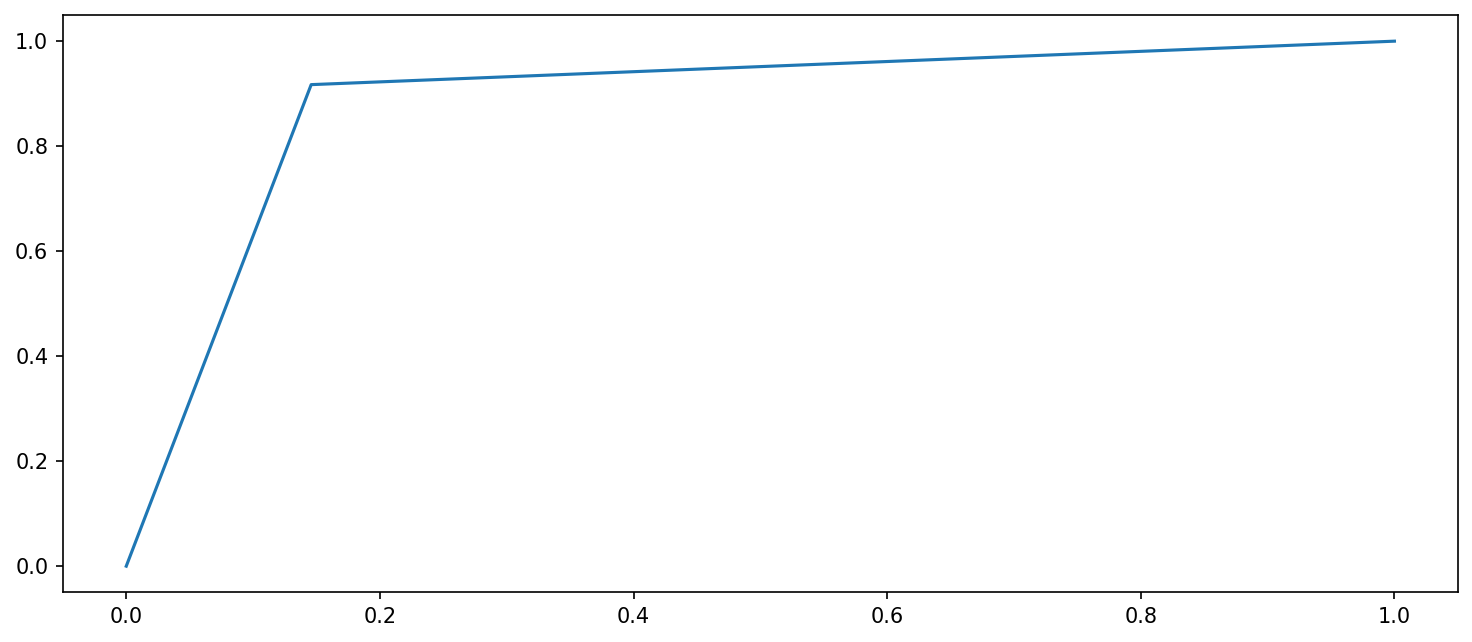

In [59]:
fig,ax = plt.subplots(figsize = (12,5),dpi = 150) # dpi = "dots per inch" or "pixels per inch". It specifies the resolution of the figure.
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.show()


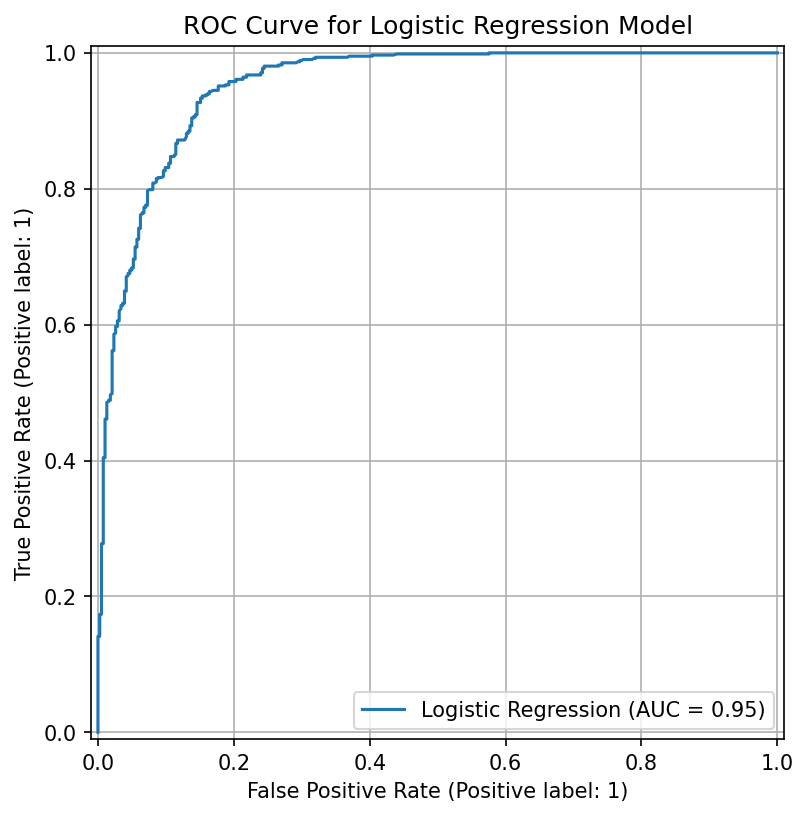

In [100]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
RocCurveDisplay.from_estimator(lr_model, x_test, y_test, ax=ax, name="Logistic Regression")

ax.set_title('ROC Curve for Logistic Regression Model')
plt.grid(True)
plt.show()

**Precision Recall Curve**

In [65]:
from sklearn.metrics import PrecisionRecallDisplay

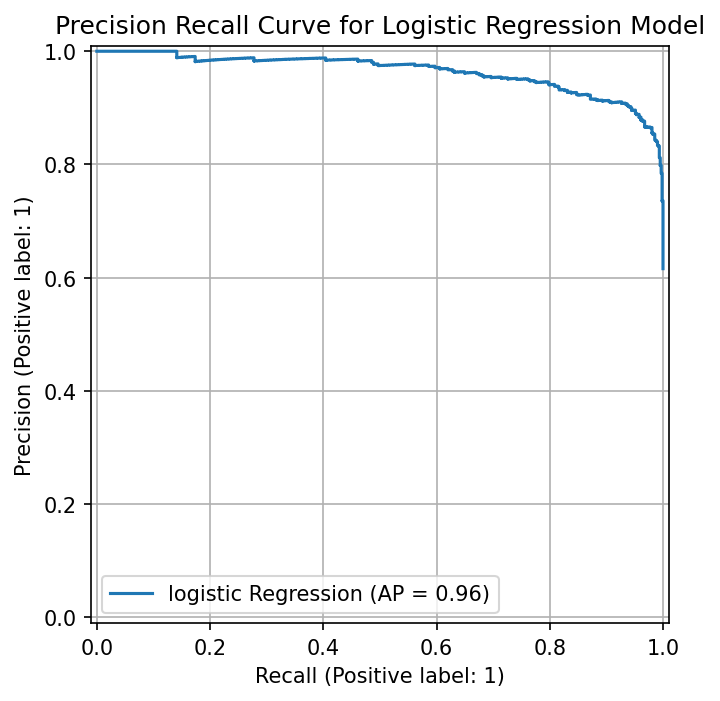

In [69]:
fig,ax = plt.subplots(figsize = (12,5),dpi = 150)
PrecisionRecallDisplay.from_estimator(lr_model,x_test,y_test,ax = ax, name = 'logistic Regression')

ax.set_title('Precision Recall Curve for Logistic Regression Model')
plt.grid(True)
plt.show()

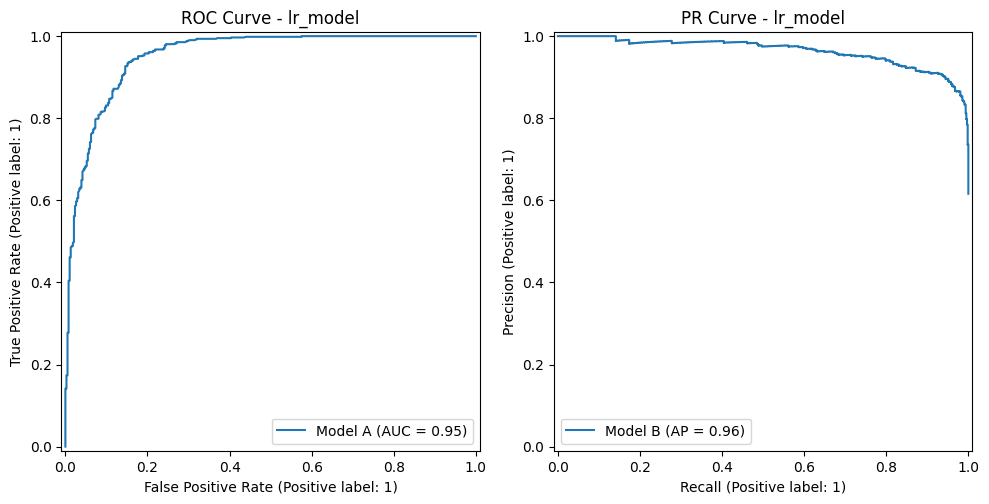

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6)) # Two subplots side-by-side

# Plot ROC curve on the first subplot (ax1)
RocCurveDisplay.from_estimator(lr_model, x_test, y_test, ax=ax1, name="Model A")
ax1.set_title("ROC Curve - lr_model")

# Plot PR curve (or another ROC curve) on the second subplot (ax2)
PrecisionRecallDisplay.from_estimator(lr_model, x_test, y_test, ax=ax2, name="Model B")
ax2.set_title("PR Curve - lr_model")


plt.tight_layout()
plt.show()

**using probablity direclty to see the classification**

In [75]:
# Instead of just getting a hard classification (0 or 1), you get a measure of the model's confidence in its prediction.

lr_model.predict_proba(x_test)

array([[0.03816281, 0.96183719],
       [0.98363648, 0.01636352],
       [0.03356355, 0.96643645],
       ...,
       [0.14765615, 0.85234385],
       [0.16492391, 0.83507609],
       [0.10872089, 0.89127911]])

In [88]:
lr_model.predict_proba(x_test)[1]

array([0.98363648, 0.01636352])

In [87]:
print(y_test[1])

0


As from the above data, row 1 of test data is predicted to be belonging to class 0 with the probability of 0.983 and class 0 of 0.016.

In actual, that row 1 correct class is class 0.